*Regression*

In [1]:
# Importing Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# Understanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Access data attributes
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index , name)


CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [4]:
# Reshaping data
data = dataset[:,12].reshape(-1,1)

In [5]:
# Shape of data
np.shape(dataset)

(506, 13)

In [6]:
# Target value
target = boston.target.reshape(-1,1)

In [7]:
# Shape of Target
np.shape(target)

(506, 1)

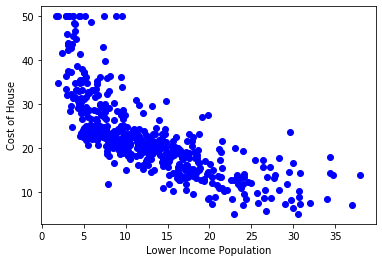

In [8]:
# Ensuring that matplotlib is working
%matplotlib inline
plt.scatter(data, target, color='blue')
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of House")
plt.show()

In [9]:
# Linear Regression
from sklearn.linear_model import LinearRegression

#Creating the model
model = LinearRegression()

# Fit the model
model.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Prediction

pred = model.predict(data)

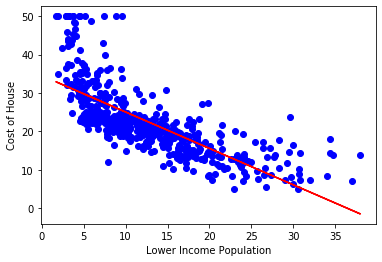

In [11]:
%matplotlib inline
plt.scatter(data, target, color='blue')
plt.plot(data, pred, color='red')
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of House")
plt.show()

In [12]:
# Circumventing curve issue using polynomial model

from sklearn.preprocessing import PolynomialFeatures

# To allow merging of models 
from sklearn.pipeline import make_pipeline

In [13]:
model1 = make_pipeline(PolynomialFeatures(7), model)

In [14]:
model1.fit(data, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [15]:
pred = model1.predict(data)

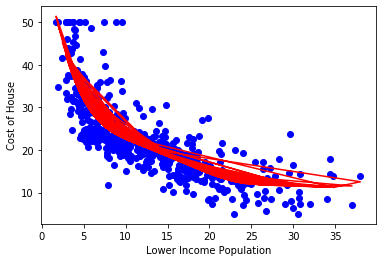

In [16]:
%matplotlib inline
plt.scatter(data, target, color='blue')
plt.plot(data, pred, color='red')
plt.xlabel("Lower Income Population")
plt.ylabel("Cost of House")
plt.show()

In [17]:
# r2 metric to judge model
from sklearn.metrics import r2_score

In [18]:
# predict using r2 score
r2_score(pred,target)

0.5353776084055396